<a href="https://colab.research.google.com/github/mgsocial/Keras/blob/master/%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mgsocial/Keras.git

Cloning into 'Keras'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


# 제 1부 딥러닝의 기초

## 1장 딥러닝이란 무엇인가




**AI**는 보통의 사람이 수행하는 지능적인 작업을 자동화하기 위한 연구 활동으로 **머신 러닝**과 **딥러닝**을 포괄하는 종합적인 분야이다.

**머신러닝**은 데이터와 데이터로부터 기대되는 라벨을 입력하면 규칙이 출력되는 것으로 명시적으로 프로그램되는 것이 아니라 훈련된다.

**딥러닝**은 머신 러닝의 특정한 하나의 분야로서 연속된 **층**에서 점진적으로 의미 있는 **표현**을 배우는 데 강하며, **데이터로부터 표현을 학습하는 수학 모델**이다. 

 -층 기반 표현 학습 / 계층적 표현 학습

 -다단계 처리 방식 

 ---


  2.1 확률적 모델링
 1) 나이브 베이즈 알고리즘
 2) 로지스틱 회귀
 
  2.2 초창기 신경망
 1) 경사 하강 최적화
 2) 합성곱 신경망(CNN)
 
  2.3 커널 방법
 1) 서포트 벡터 머신(SVM)
 
  2.4 트리 방법
 1) 의사결정트리
 2) 랜덤 포레스트 알고리즘(앙상블)
 3) 그래디언트 부스팅(손실 학습)
 
   2.5 신경망
 1) 심층 합성곱 신경망(ConvNet; CNN)
 2) 자연어 처리(NLP-->RNN)
 3) 시계열(LSTM)

---


   **딥러닝의 차이점**

    층을 거치면서 점진적으로 더 복잡한 표현 생성(연속적인 온라인 학습)

    점진적인 중간 표현이 공동으로 학습됨(쉬운 병렬화)

    특성 공학이 필요치 않아 복잡하고 불안정한 엔지니어링 과정을 단순화(엔드-투-엔드)



## 2장 신경망의 수학적 구성 요소


 ### 흑백 숫자 분류 문제(MNIST)
 
 - 6만 개의 훈련(train) 데이터
 - 1만 개의 검증(test) 데이터


 

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

케라스에서 MNIST 데이터셋 적재하기

In [3]:
from keras.datasets import mnist      # NumPy 배열 형태로 케라스에 이미 포함

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


`train_images`와 `train_labels`가 모델이 학습해야 할 훈련 세트를 구성합니다. 모델은 `test_images`와 `test_labels`로 구성된 테스트 세트에서 테스트될 것입니다. 이미지는 넘파이 배열로 인코딩되어 있고 레이블은 0에서부터 9까지의 숫자 배열입니다. 이미지와 레이블은 일대일 관계를 가집니다.


훈련 데이터를 살펴보겠습니다:


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0].shape         # 28 * 28 픽셀

(28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

다음은 테스트 데이터입니다:

In [8]:
test_images.shape

(10000, 28, 28)

다섯 번째 샘플을 맷플롯립 라이브러리를 사용해 확인해 보겠습니다.

In [0]:
import matplotlib.pyplot as plt

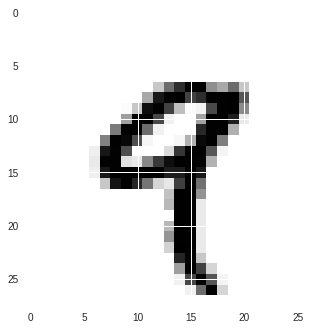

In [10]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

   **신경망 작업순서**
   
   
  
  1) 훈련 데이터 `train_images`와 `train_labels`를 네트워크에 주입
  
  2) 그러면 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습됨. 
  
  3) `test_images`에 대한 예측을 네트워크에게 요청 
  
  4) 예측이 `test_labels`와 맞는지 확인


  **신경망 구조(망) 생성 단계**

In [11]:
from keras.models import Sequential
from keras.layers import Dense

network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


이 예에서는 조밀하게 연결된 (또는 완전 연결된) 신경망 층인 `Dense` 층 2개가 연속되어 있다. 

두 번째 (즉, 마지막) 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 **소프트맥스 층**이다. 
각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률이다.

  **컴파일 단계**

* 손실 함수(loss funtion) : 훈련 데이터에서 신경망의 성능을 측정하는 방법


* 옵티마이저(optimizer): 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘


* 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려



In [0]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  **데이터 준비 단계(전처리)**

In [0]:
train_images = train_images.reshape((60000, 28 * 28))     # 2차원 배열로 reshape
train_images = train_images.astype('float32') / 255       # 0~1 사이로 스케일링

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)          # 레이블을 범주형으로 인코딩
test_labels = to_categorical(test_labels)

  **훈련셋 모델 학습 단계**
  

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2546 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1033 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0686 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0499 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0370 - acc: 0.9892


   **테스트셋 모델 검증**
    

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


In [17]:
print('test_accuracy:', test_acc)

test_accuracy: 0.9797


### 텐서플로 기본 개념

  * **텐서**: 데이터를 위한 컨테이너(container)
  * **랭크**(rank): 텐서의 축의 개수
  * **스칼라**(0D 텐서): 하나의 숫자만 담고 있는 텐서; 0차원의 넘파이 배열
  * **벡터**(1D 텐서): 숫자의 배열; 하나의 축을 가지는 텐서
  * **행렬**(2D 텐서): ndim == 2
  * **3D 텐서와 고차원 텐서**

  **텐서플로 속성**

    -축의 개수(랭크)
 
    -크기(shape)
 
    -데이터타입

In [18]:
print(train_images.ndim)

2


In [19]:
print(train_images.shape)                     # 28 * 28 = 784

(60000, 784)


In [20]:
print(train_images.dtype)

float32


In [0]:
train_images = train_images.reshape(60000, 28, 28)

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [24]:
my_slice = train_images[10:100, : , :]                  # : 전체 인덱스
print(my_slice.shape)

(90, 28, 28)


In [25]:
my_slice = train_images[10:100, 0:28 , 0:28]           
print(my_slice.shape)

(90, 28, 28)


In [0]:
import numpy as np

 * numpy(Numerical Python)  메서드
     
     - data.ndim : 차원의 수
     - data.shape : 차원의 크기
     - data.dtype :  저장된 자료형
     - data.astype() : 자료형 변경
     - data.reshape() : 크기 변경
     - data.swapaxes() : 축의 위치 변경
     
     - data.argmax() : 
     - np.maximum()
     
     - np.equl() :
     - np.exp() :
     - np.expand_dims() : 
     - np.random.randint() : 
     - np.eye() :
     

https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795


**배치 데이터** 

**벡터 데이터** : (samples, features) 행렬 크기의 2D 텐서; 대부분의 경우

**시계열 데이터 또는 시퀀스 데이터** : (samples, timesteps, features) 크기의 3D 텐서; 

 ![3D 시계열 데이터](https://www.oreilly.com/library/view/deep-learning/9781491924570/assets/dpln_0417.png)


**이미지 데이터** : (samples, height, width, channels) or (samples, channels,  height, width) 크기의 4D 텐서; 텐서플로에서 사용하는 channels-last 방식과 씨아노에서 사용하는 channel-first 방식

**비디오 데이터** : (samples, frames, height, width, channels) or (samples, frames, channels, height, width) 크기의 5D 텐서; 하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지





**텐서 연산**


케라스의 층은 다음과 같이 생성합니다.


In [29]:
keras.layers.Dense(512, activation='relu')

In [0]:
def relu(x):
    return np.maximum(0,x)

In [0]:
def dot(W, x) :
  return np.dot(x, W)

In [0]:
W = np.array([[1,2,3], [1,2,3]], dtype='float32')

In [0]:
x = np.array([[1,2], [1,2], [1,2]], dtype='float32')

In [0]:
b = 1

In [0]:
output = relu(dot(W, x) + b)

원소별 연산


파이썬으로 단순한 원소별 연산을 구현한다면 다음 relu 연산 구현처럼 for 반복문을 사용할 것입니다.

In [0]:
def naive_relu(x):
    assert len(x.shape) == 2                 # x는 2D 넘파이 배열입니다.

    x = x.copy()                            # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [0]:
def naive_add(x, y):
    assert len(x.shape) == 2               # x와 y는 2D 넘파이 배열입니다.
    assert x.shape == y.shape

    x = x.copy()                          # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

브로드캐스팅

모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅(broadcasting)됩니다.

예를들어,
X의 크기는 (32, 10)이고 y의 크기는 (10,)라고 가정합시다. 먼저 y에 비어 있는 첫 번째 축을 추가하여 크기를 (1, 10)으로 만듭니다. 그런 다음 y를 이 축에 32번 반복하면 텐서 Y의 크기는 (32, 10)이 됩니다. 여기에서 Y[i, :] == y for i in range(0, 32)입니다. 이제 X와 Y의 크기가 같으므로 더할 수 있습니다.

In [0]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2                   #  x는 2D 넘파이 배열입니다.
    assert len(y.shape) == 1                   # y는 넘파이 벡터입니다.
    assert x.shape[1] == y.shape[0]

    x = x.copy()                              # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [0]:
x = np.random.random((64, 3, 32, 10))                   # x는 (64, 3, 32, 10) 크기의 랜덤 텐서입니다.
y = np.random.random((32, 10))                          # y는 (32, 10) 크기의 랜덤 텐서입니다.

z = np.maximum(x, y)                                    # 출력 z 크기는 x와 동일하게 (64, 3, 32, 10)입니다.

In [61]:
z.shape

(64, 3, 32, 10)

텐서 점곱


텐서플로에서는 tf.matmul(x, y)처럼 사용합니다. 파이썬 3.5 이상에서는 x @ y처럼 계산할 수도 있습니다. 케라스에서는 from keras import backend as K; K.dot(x, y)처럼 사용합니다.

In [0]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1                      #  x와 y는 넘파이 벡터입니다.
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [0]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2                  #  x는 넘파이 행렬입니다.
    assert len(y.shape) == 1                  # y는 넘파이 벡터입니다.
    assert x.shape[1] == y.shape[0]           #  x의 두 번째 차원이 y의 첫 번째 차원과 같아야 합니다!

    z = np.zeros(x.shape[0])                  # 이 연산은 x의 행과 같은 크기의 0이 채워진 벡터를 만듭니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [0]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

두 텐서 중 하나라도 ndim이 1보다 크면 dot 연산에 교환 법칙이 성립되지 않습니다.

In [0]:
def naive_matrix_dot(x, y):

    assert len(x.shape) == 2                      #  x와 y는 넘파이 행렬입니다.
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]           # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 합니다!

    z = np.zeros((x.shape[0], y.shape[1]))     # 이 연산은 0이 채워진 특정 크기의 벡터를 만듭니다.
    for i in range(x.shape[0]):                  #  x의 행을 반복합니다.
        for j in range(y.shape[1]):              # y의 열을 반복합니다.
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

고차원 텐서 간의 점곱을 할 수 있습니다.

(a, b, c, d) . (d,) -> (a, b, c)

(a, b, c, d) . (d, e) -> (a, b, c, e)

**텐서 크기 변환**


당연히 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일합니다. 

In [0]:
train_images = train_images.reshape((60000, 28 * 28))

In [73]:
x = np.array([[0., 1.],
	            [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [76]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [79]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

자주 사용하는 특별한 크기 변환은 전치(transposition)입니다. 

In [84]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


In [85]:
x = x.T
print(x.shape)

(300, 20)


**그래디언트 기반 최적화**





output = relu(dot(W, input) + b)





이 식에서 텐서 W와 b는 층의 속성처럼 볼 수 있습니다. **가중치**(weight) 또는 훈련되는 파라미터(trainable parameter)라고 부릅니다(각각 커널(kernel)25과 **편향**(bias)이라고 부르기도 합니다). 이런 가중치에는 훈련 데이터를 신경망에 노출시켜서 학습된 정보가 담겨 있습니다.

초기에는 가중치 행렬이 작은 난수로 채워져 있습니다(**무작위 초기화**(random initialization) 단계라고 부릅니다). 

피드백 신호에 기초하여 가중치가 점진적으로 조정될 것입니다. 이런 점진적인 조정 또는 **훈련**(training)이 머신 러닝 학습의 핵심입니다.



신경망에 사용된 모든 연산이 **미분 가능**(differentiable)하다는 장점을 사용하여 네트워크 가중치에 대한 손실의 **그래디언트**(gradient)를 계산하는 것이 훨씬 더 좋은 방법입니다. 그래디언트의 반대 방향으로 가중치를 이동하면 손실이 감소됩니다.

그래디언트(gradient(f)(W0))는 텐서 연산의 변화율()W0에서 f(W)의 기울기)입니다.

함수 f(W)의 입장에서는 그래디언트의 반대 방향으로 W를 움직이면 f(W)의 값을 줄일 수 있습니다.29 예를 들어 **W1 = W0 - step * gradient(f)(W0)** 입니다(step은 스케일을 조정하기 위한 작은 값입니다). 

**확률적 경사 하강법**


1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출합니다.

2. x를 사용하여 네트워크를 실행하고(정방향 패스(forward pass) 단계), 예측 y_pred를 구합니다.

3. 이 배치에서 y_pred와 y 사이의 오차를 측정하여 네트워크의 손실을 계산합니다.

4. 네트워크의 파라미터에 대한 손실 함수의 그래디언트를 계산합니다(역방향 패스(backward pass)).

5. 그래디언트의 반대 방향으로 파라미터를 조금 이동시킵니다. 예를 들어 W -= step * grad3ient처럼 하면 배치에 대한 손실이 조금 감소할 것입니다.

6. 네트워크의 모든 가중치를 업데이트합니다.

![대체 텍스트](https://i1.wp.com/mstst33.com/wp-content/uploads/2018/11/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2018-11-23-%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE-7.29.17.png?resize=300%2C258)

In [87]:
import tensorflow as tf

# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

# 기울기 a와 y 절편 b의 값을 임의로 정한다.
# 단, 기울기의 범위는 0 ~ 10 사이이며 y 절편은 0 ~ 100 사이에서 변하게 한다.
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))

# y에 대한 일차 방정식 ax+b의 식을 세운다.
y = a * x_data + b

# 텐서플로 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data )))

# 학습률 값
learning_rate = 0.1

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

# 텐서플로를 이용한 학습
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 2001번 실행(0번 째를 포함하므로)
    for step in range(2001):
        sess.run(gradient_decent)
        # 100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b = %.4f" % (step,sess.run(rmse),sess.run(a),sess.run(b)))


Epoch: 0, RMSE = 30.2139, 기울기 a = 7.5235, y 절편 b = 80.5984
Epoch: 100, RMSE = 2.8860, 기울기 a = 2.2299, y 절편 b = 79.4181
Epoch: 200, RMSE = 2.8826, 기울기 a = 2.2601, y 절편 b = 79.2379
Epoch: 300, RMSE = 2.8815, 기울기 a = 2.2773, y 절편 b = 79.1353
Epoch: 400, RMSE = 2.8811, 기울기 a = 2.2871, y 절편 b = 79.0770
Epoch: 500, RMSE = 2.8810, 기울기 a = 2.2927, y 절편 b = 79.0438
Epoch: 600, RMSE = 2.8810, 기울기 a = 2.2958, y 절편 b = 79.0249
Epoch: 700, RMSE = 2.8810, 기울기 a = 2.2976, y 절편 b = 79.0142
Epoch: 800, RMSE = 2.8810, 기울기 a = 2.2987, y 절편 b = 79.0081
Epoch: 900, RMSE = 2.8810, 기울기 a = 2.2992, y 절편 b = 79.0046
Epoch: 1000, RMSE = 2.8810, 기울기 a = 2.2996, y 절편 b = 79.0026
Epoch: 1100, RMSE = 2.8810, 기울기 a = 2.2998, y 절편 b = 79.0015
Epoch: 1200, RMSE = 2.8810, 기울기 a = 2.2999, y 절편 b = 79.0008
Epoch: 1300, RMSE = 2.8810, 기울기 a = 2.2999, y 절편 b = 79.0005
Epoch: 1400, RMSE = 2.8810, 기울기 a = 2.3000, y 절편 b = 79.0003
Epoch: 1500, RMSE = 2.8810, 기울기 a = 2.3000, y 절편 b = 79.0002
Epoch: 1600, RMSE = 2.8810, 기울기 a =

대상 파라미터가 작은 학습률을 가진 SGD로 최적화되었다면 최적화 과정이 전역 최솟값으로 향하지 못하고 이 지역 최솟값에 갇히게 될 것입니다.

![SGD](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/48_blog_image_2.png)

모멘텀이 충분하면 공이 골짜기에 갇히지 않고 전역 최솟값에 도달할 것입니다. 모멘텀은 현재 기울기 값(현재 가속도)뿐만 아니라 (과거의 가속도로 인한) 현재 속도를 함께 고려하여 각 단계에서 공을 움직입니다.

**고급 경사 하강법**

1. 확률적 경사 하강법(SGD): 랜덤하게 추출한 일부 데이터를 사용해 더 빨리, 자주 업데이트를 하게 하는 것 --> 속도 개선 효과 
 
 keras.optimizer.SGD(lr = 0.1)

2. 모멘텀(Momentum): 관성의 방향을 고려해 진동과 폭을 줄이는 효과 --> 정확도 개선  

 keras.optimizer.SGD(lr = 0.1, momentum = 0.9)
 
3. 네스테로프 모멘텀(NAG): 모멘텀이 이동시킬 방향으로 미리 이동해서 그레이디언트를 계산. 불필요한 이동을 줄이는 효과 --> 정확도 개선

 keras.optimizer.SGD(lr = 0.1, momentum = 0.9, nesterov = True)
 
4. 아다그라드(Adagrad): 변수의 업데이트가 잦으면 학습률을 적게 하여 이동 보폭을 조절하는 방법 --> 보폭 크기 개선

 keras.optimizer.Adagrad(lr = 0.01, epsilon = 1e - 6)
 
 5. 알엠에스프롭(RMSProp): 아다그라드의 보폭 민감도를 보완한 방법 --> 보폭 크기 개선
 
 keras.optimizer.RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e - 08, decay = 0.0)
 
 6. 아담(Adam): 모멘텀과 알엠에스프롭 방법을 합친 방법 --> 정확도와 보폭 크기 개선
 
 keras.optimizer.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e - 08, decay = 0.0)

**역전파 알고리즘**

연쇄 법칙을 신경망의 그래디언트 계산에 적용하여 역전파(Backpropagation) 알고리즘(후진 모드 자동 미분(reverse-mode automatic differentiation)이라고도 부릅니다)이 탄생되었습니다. 